In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('filtered_user_df.csv')
df.head(10)

,Unnamed: 0.1,Unnamed: 0,user,artist_name,play_count,artist_url
0,0,0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson
1,1,1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem
2,2,2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky
3,3,3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park
4,7,7,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots
5,8,8,nyancrimew,Macklemore,1620,https://www.last.fm/music/Macklemore
6,13,13,nyancrimew,Jon Bellion,1004,https://www.last.fm/music/Jon+Bellion
7,17,17,nyancrimew,RADWIMPS,878,https://www.last.fm/music/RADWIMPS
8,18,18,nyancrimew,ZHU,814,https://www.last.fm/music/ZHU
9,23,23,nyancrimew,Red Velvet,598,https://www.last.fm/music/Red+Velvet


# Basic Statistics 

In [3]:
# getting total number of unique users
total_users = df['user'].nunique()

# total num of unique artists
total_artists = df['artist_name'].nunique()

# avg play count per user
avg_play_count_per_user = df.groupby('user')['play_count'].sum().mean()

# avg play count per artist
avg_play_count_per_artist = df.groupby('artist_name')['play_count'].sum().mean()

print(f"Total Users: {total_users}")
print(f"Total Artists: {total_artists}")
print(f"Average Play Count per User: {avg_play_count_per_user}")
print(f"Average Play Count per Artist: {avg_play_count_per_artist}")


Total Users: 193707
Total Artists: 97310
Average Play Count per User: 22857.88817131028
Average Play Count per Artist: 45501.31480834447


       Unnamed: 0.1    Unnamed: 0    play_count
count  7.682455e+06  7.682455e+06  7.682455e+06
mean   4.726273e+06  4.023246e+06  5.763435e+02
std    2.729196e+06  2.683919e+06  2.436419e+03
min    0.000000e+00  0.000000e+00  1.000000e+00
25%    2.362998e+06  1.630317e+06  6.800000e+01
50%    4.725495e+06  3.994745e+06  2.290000e+02
75%    7.090722e+06  6.357298e+06  5.880000e+02
max    9.453849e+06  8.721835e+06  2.352717e+06
Mean Play Count: 576.3434922820895
Median Play Count: 229.0
Mode Play Count: 1
Skewness of Play Count: 245.0719674753781
Kurtosis of Play Count: 152503.53883070307


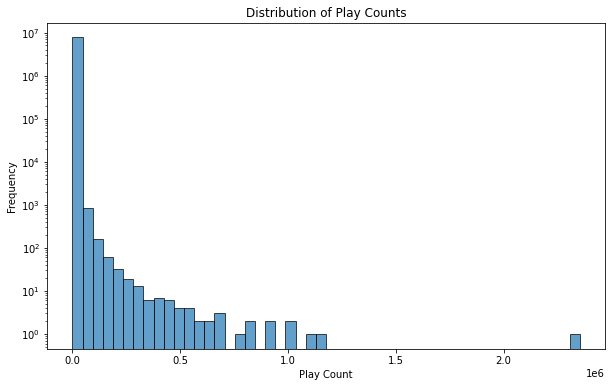

In [4]:
print(df.describe())

# mean median mode of play counts
mean_play_count = df['play_count'].mean()
median_play_count = df['play_count'].median()
mode_play_count = df['play_count'].mode()[0]

# skewness of play counts
skewness_play_count = df['play_count'].skew()

# kurtosis of play counts for outliers
kurtosis_play_count = df['play_count'].kurtosis()

print(f"Mean Play Count: {mean_play_count}")
print(f"Median Play Count: {median_play_count}")
print(f"Mode Play Count: {mode_play_count}")
print(f"Skewness of Play Count: {skewness_play_count}")
print(f"Kurtosis of Play Count: {kurtosis_play_count}")

plt.figure(figsize=(10, 6))
plt.hist(df['play_count'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Play Counts')
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.yscale('log')  # log scale bc wide distribution
plt.show()


# User-Level Analysis

In [5]:
# getting the top 10 users
user_play_counts = df.groupby('user')['play_count'].sum().reset_index()
top_users = user_play_counts.sort_values(by='play_count', ascending=False)
print(top_users.head(10))

                  user  play_count
170305       shodate76     3714448
72935           Zandhr     2125259
116877         higorrz     2109043
850              AGGAV     1741957
91611        chemkelly     1627015
94853         crs16520     1618729
146505   monarcaladeus     1529169
90823        celestuls     1333451
158650          pixzen     1217551
45620   Morris_Albert_     1198810


In [6]:
# calculating the number of unique artists per user
unique_artists_per_user = df.groupby('user')['artist_name'].nunique()
total_play_count_per_user = df.groupby('user')['play_count'].sum()
user_engagement = pd.DataFrame({
    'Unique_Artists': unique_artists_per_user,
    'Total_Play_Count': total_play_count_per_user
}).reset_index()

## WILL COME BACK TO THIS ##
# print(user_engagement.head())

# print(user_engagement.describe())

# # distribution of Unique Artists per User
# plt.figure(figsize=(10, 6))
# sns.histplot(user_engagement['Unique_Artists'], bins=30, kde=True)
# plt.title('Distribution of Unique Artists per User')
# plt.xlabel('Number of Unique Artists')
# plt.ylabel('Number of Users')
# plt.show()

# # distribution of Total Play Count per User
# plt.figure(figsize=(10, 6))
# sns.histplot(user_engagement['Total_Play_Count'], bins=30, kde=True, log_scale=True)
# plt.title('Distribution of Total Play Count per User')
# plt.xlabel('Total Play Count (Log Scale)')
# plt.ylabel('Number of Users')
# plt.show()


In [7]:
unique_artists_array = user_engagement['Unique_Artists'].to_numpy()
total_play_count_array = user_engagement['Total_Play_Count'].to_numpy()

# # plotting distribution of Unique Artists per User
# plt.figure(figsize=(10, 6))
# sns.histplot(unique_artists_array, bins=30, kde=True)
# plt.title('Distribution of Unique Artists per User')
# plt.xlabel('Number of Unique Artists')
# plt.ylabel('Number of Users')
# plt.show()

# # plotting distribution of Total Play Count per User
# plt.figure(figsize=(10, 6))
# sns.histplot(total_play_count_array, bins=30, kde=True, log_scale=True)
# plt.title('Distribution of Total Play Count per User')
# plt.xlabel('Total Play Count (Log Scale)')
# plt.ylabel('Number of Users')
# plt.show()


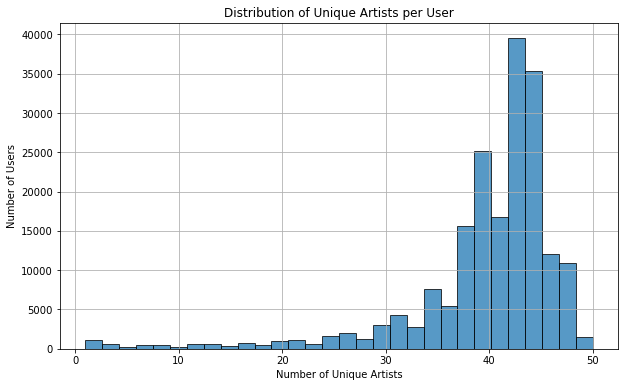

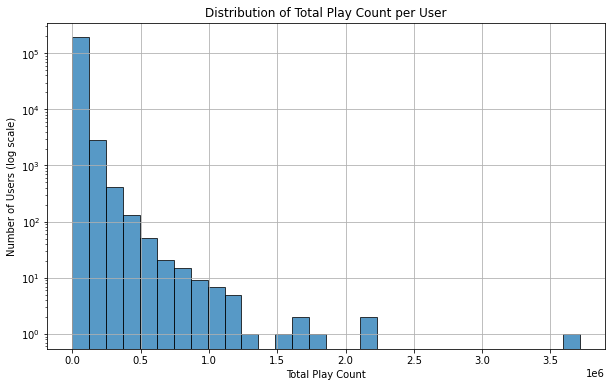

In [8]:
# getting the distribution of Unique Artists per User
plt.figure(figsize=(10, 6))
plt.hist(unique_artists_array, bins=30, edgecolor='black', alpha=0.75)
plt.title('Distribution of Unique Artists per User')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# distribution of Total Play Count per User
plt.figure(figsize=(10, 6))
plt.hist(total_play_count_array, bins=30, edgecolor='black', alpha=0.75, log=True)
plt.title('Distribution of Total Play Count per User')
plt.xlabel('Total Play Count')
plt.ylabel('Number of Users (log scale)')
plt.grid(True)
plt.show()



In [9]:
# aggregating to find the total play count for each artist
total_play_count_by_artist = df.groupby('artist_name')['play_count'].sum().reset_index(name='Total_Play_Count')
top_artists_by_play_count = total_play_count_by_artist.sort_values(by='Total_Play_Count', ascending=False)

# top 10 artists by total play count
print("Top Artists by Total Play Count:")
print(top_artists_by_play_count.head(10))

# getting the number of unique listeners for each artist
unique_listeners_by_artist = df.groupby('artist_name')['user'].nunique().reset_index(name='Unique_Listeners')
top_artists_by_unique_listeners = unique_listeners_by_artist.sort_values(by='Unique_Listeners', ascending=False)

# top 10 artists by unique listeners
print("\nTop Artists by Unique Listeners:")
print(top_artists_by_unique_listeners.head(10))


Top Artists by Total Play Count:
          artist_name  Total_Play_Count
64569       Radiohead          41983697
76600    Taylor Swift          34268632
45673       Lady Gaga          32091963
5846   Arctic Monkeys          26447442
45808    Lana Del Rey          25931664
12187  Britney Spears          24100274
55766            Muse          22845764
16649        Coldplay          21327175
53064       Metallica          20587889
47485     Linkin Park          18686664

Top Artists by Unique Listeners:
                 artist_name  Unique_Listeners
64569              Radiohead             47460
16649               Coldplay             34398
5846          Arctic Monkeys             28925
55766                   Muse             28485
65389  Red Hot Chili Peppers             24861
57885                Nirvana             23274
45673              Lady Gaga             22752
79849            The Killers             21893
53064              Metallica             21786
47485            Linkin

In [10]:
# total play count for each artist
total_play_count_by_artist = df.groupby('artist_name')['play_count'].sum().reset_index(name='Total_Play_Count')

# number of unique listeners for each artist
unique_listeners_by_artist = df.groupby('artist_name')['user'].nunique().reset_index(name='Unique_Listeners')

artist_metrics = pd.merge(total_play_count_by_artist, unique_listeners_by_artist, on='artist_name')

# making a niche score that considers both play count and unique listeners for simplicity i'm using a ratio of total play count to unique listeners as an indicator
artist_metrics['Niche_Score'] = artist_metrics['Total_Play_Count'] / artist_metrics['Unique_Listeners']

# finding those with high play counts but fewer unique listeners
niche_artists = artist_metrics.sort_values(by='Niche_Score', ascending=False)

# output of top niche artists
print(niche_artists.head(10))

        artist_name  Total_Play_Count  Unique_Listeners  Niche_Score
94075         アナーキー            493489                 1     493489.0
90657     Zippy Kid            410220                 1     410220.0
1310    Aaron Diehl            133343                 1     133343.0
73416      Spoilers             99232                 1      99232.0
52053  Mats Rådberg             87364                 1      87364.0
19565  Daniel Testa             60277                 1      60277.0
90394       Zamrish             54531                 1      54531.0
69905     Selection             53190                 1      53190.0
52091  Matt Henshaw             52211                 1      52211.0
57379      Ngọc Lan             38240                 1      38240.0


In [11]:
play_counts = df['play_count'].to_numpy()

# # distribution of Play Counts with seaborn's histplot # does not work come back to this
# plt.figure(figsize=(10, 6))
# sns.histplot(play_counts, bins=50, kde=True, log_scale=True)
# plt.title('Distribution of Play Counts')
# plt.xlabel('Play Count (log scale)')
# plt.ylabel('Frequency')
# plt.show()

# # spread of play counts and outliers 
# plt.figure(figsize=(10, 6))
# plt.boxplot(play_counts, vert=False) 
# plt.title('Boxplot of Play Counts')
# plt.xscale('log') 
# plt.xlabel('Play Count')
# plt.show()


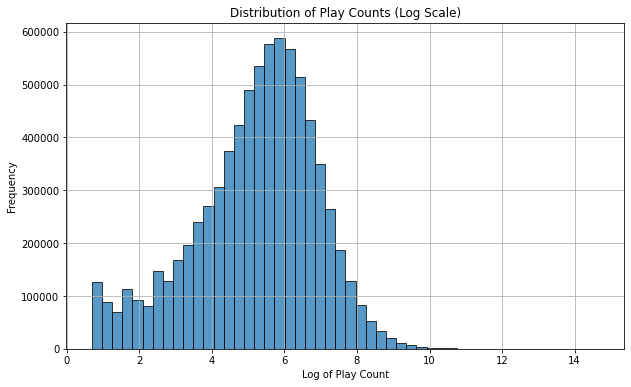

In [12]:
# distribution of Play Counts
plt.figure(figsize=(10, 6))
# applying log scale
log_play_counts = np.log1p(play_counts)  # log1p for log scale to handle zero play counts
plt.hist(log_play_counts, bins=50, edgecolor='black', alpha=0.75)
plt.title('Distribution of Play Counts (Log Scale)')
plt.xlabel('Log of Play Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

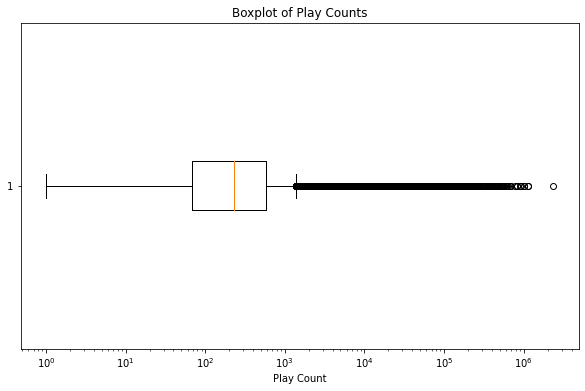

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(play_counts, vert=False)  
plt.xscale('log')  
plt.title('Boxplot of Play Counts')
plt.xlabel('Play Count')
plt.show()

**Interpretation:**

- The distribution of play counts is right-skewed, meaning that while a large number of artists have relatively few plays, there's a smaller number of artists with a very high number of plays.

- There's a significant disparity in popularity among artists. We know this as small number of artists (the outliers on the higher end) have exceptionally high play counts, which infers that these artists are much more popular, or have certain tracks (most likely viral hits) that are extremely successful.

- The median and IQR indicates to us that this is the typical range of play counts for most artists. Since the median is around 100 plays (given this cluster of the dataset), most artists have play counts around this value.

- The outliers represent artists who're likely to have hit songs or albums, meaning that they most likely dominate the play counts within the entire dataset. These could be artists with viral hits or a large fanbase that frequently listens to their music (such as Taylor Swift). 

- For music platforms and/or record labels, the outliers could possibly represent any key areas of focus for marketing and promotion, as these artists are likely driving a significant portion of user engagement.

- The longer tail of the distribution suggests to us that there's a wide variety of artists who might not individually have high play counts but collectively represent a substantial portion of the market. This can potentially be an essential consideration for music services that aim to offer a diverse catalog.

**Conclusion:** Since there's a wide range of listening behavior, music recommendation systems need to account for the long tail and not just focus on the most popular artists. Personalized recommendations can help users discover less popular artists whose music fits their tastes.

Within the context of music streaming services or content platforms, this pattern may indicate, that while there is a big selection of artists available, most users tend to listen to a relatively small selection of popular artists or tracks. This may be important for businesses in the music industry for several reasons:

**Catalog management:** Knowing that a small number of artists drive most of the plays might influence how a streaming service manages its catalog, potentially focusing on securing the rights to popular content.

**Recommendation systems (re: our capstone):** Understanding the distribution of plays can help in designing better recommendation systems that not only recommend popular music but also expose listeners to the wider variety of less-played artists.

**Marketing and promo:** Music marketers might focus their efforts on the few artists who capture the majority of listens, but they might also look for opportunities to promote emerging artists who have the potential to enter the "head" of the distribution.

**Discovering content:** The presence of a long tail in the distribution suggests that there's an opportunity to improve content discovery mechanisms, helping users find less popular artists that they may enjoy.

# Artist-Level Analysis

In [14]:
from scipy.sparse import csr_matrix

users = pd.Categorical(df['user']).codes
artists = pd.Categorical(df['artist_name']).codes
plays = df['play_count']

# rows correspond to users and columns to artists
user_artist_sparse_matrix = csr_matrix((plays, (users, artists)), shape=(len(df['user'].unique()), len(df['artist_name'].unique())))

print(user_artist_sparse_matrix)


  (0, 1140)	519
  (0, 3266)	475
  (0, 4340)	887
  (0, 5342)	523
  (0, 8966)	446
  (0, 11379)	816
  (0, 13841)	477
  (0, 14510)	664
  (0, 16416)	643
  (0, 17630)	1392
  (0, 20873)	692
  (0, 25895)	633
  (0, 26223)	799
  (0, 27631)	445
  (0, 28417)	431
  (0, 28527)	420
  (0, 29267)	388
  (0, 30312)	523
  (0, 31903)	396
  (0, 39930)	942
  (0, 41420)	594
  (0, 55222)	387
  (0, 56244)	410
  (0, 57270)	831
  (0, 60725)	796
  :	:
  (193706, 34622)	283
  (193706, 36843)	67
  (193706, 41852)	77
  (193706, 42082)	73
  (193706, 43083)	60
  (193706, 47573)	82
  (193706, 54248)	127
  (193706, 56973)	80
  (193706, 62902)	62
  (193706, 63721)	268
  (193706, 64061)	59
  (193706, 67945)	64
  (193706, 68143)	114
  (193706, 70448)	171
  (193706, 71427)	140
  (193706, 72558)	239
  (193706, 72963)	87
  (193706, 74357)	83
  (193706, 74892)	76
  (193706, 75606)	109
  (193706, 75993)	82
  (193706, 84466)	117
  (193706, 84485)	192
  (193706, 84946)	90
  (193706, 88537)	66


In [15]:
from sklearn.cluster import MiniBatchKMeans

# MiniBatchKMeans for clustering bc the df is too big
n_clusters = 5  # sample
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(user_artist_sparse_matrix)

print(clusters[:10])


[3 3 3 3 0 3 0 3 0 3]


In [16]:
# mapping cluster labels back to the original users
df['Cluster'] = clusters[users]  

# avg play count per cluster
average_play_count_per_cluster = df.groupby('Cluster')['play_count'].mean()
print(average_play_count_per_cluster)

# top 5 artists in each cluster by total play count
top_artists_per_cluster = df.groupby(['Cluster', 'artist_name'])['play_count'].sum().reset_index()
top_artists_per_cluster = top_artists_per_cluster.sort_values(['Cluster', 'play_count'], ascending=[True, False])
top_artists_per_cluster = top_artists_per_cluster.groupby('Cluster').head(5)
print(top_artists_per_cluster)

# my interpretation: where if certain clusters have high average play counts, those clusters 
# might represent our most engaged users. the most popular artists per cluster may 
# indicate different musical preferences or genres that define each user segment.

# note: arctic monkeys on here a few times.. 

Cluster
0    1260.308416
1    2177.170771
2    2357.121553
3     273.425951
4    1635.217769
Name: play_count, dtype: float64
        Cluster     artist_name  play_count
32942         0    Taylor Swift    31197061
19519         0       Lady Gaga    28486619
27755         0       Radiohead    27574661
5183          0  Britney Spears    22363252
19580         0    Lana Del Rey    21114124
43426         1        Coldplay     5907589
48048         1       Radiohead     5090141
42353         1  Arctic Monkeys     4923139
50250         1              U2     3298687
46948         1       Metallica     2683358
54820         2            Muse     7151524
51549         2  Arctic Monkeys     5148952
55376         2       Radiohead     2190633
56382         2     The Killers     2133463
54164         2    Lana Del Rey     1937807
120285        3       Radiohead     7054090
73714         3        Coldplay     4652746
63204         3  Arctic Monkeys     4059901
111743        3            Muse     36

# Play Count Analysis

count    7.682455e+06
mean     5.763435e+02
std      2.436419e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.290000e+02
75%      5.880000e+02
max      2.352717e+06
Name: play_count, dtype: float64
Number of outliers: 696267


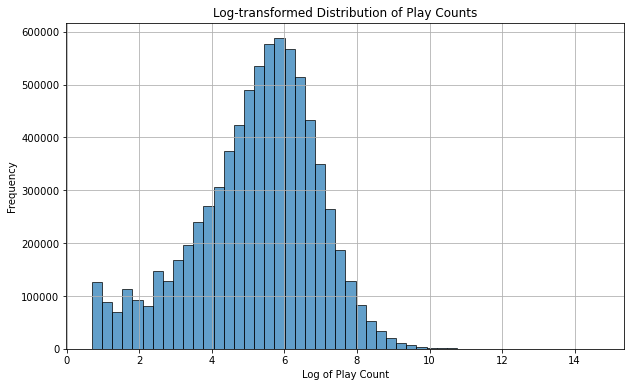

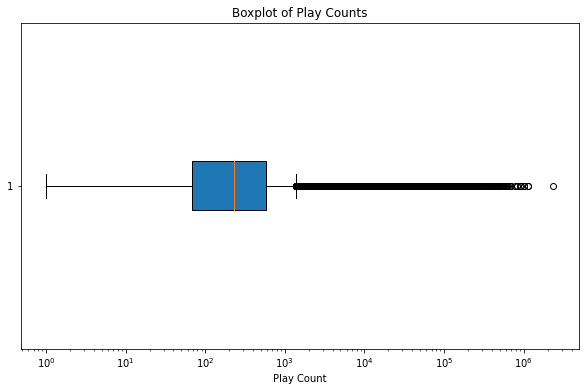

In [17]:
play_count_stats = df['play_count'].describe()
print(play_count_stats)

# outliers using IQR
Q1 = df['play_count'].quantile(0.25)
Q3 = df['play_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['play_count'] < (Q1 - 1.5 * IQR)) | (df['play_count'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

# plotting w log scale
plt.figure(figsize=(10, 6))
# applying log transformation to each play count to avoid taking log(0)
log_play_counts = np.log1p(df['play_count'])
plt.hist(log_play_counts, bins=50, edgecolor='black', alpha=0.7)
plt.title('Log-transformed Distribution of Play Counts')
plt.xlabel('Log of Play Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot(df['play_count'], vert=False, patch_artist=True)  
plt.xscale('log') 
plt.title('Boxplot of Play Counts')
plt.xlabel('Play Count')
plt.show()


**histogram:** the frequency of different play counts on a logarithmic scale. The shape of the distribution is approximately normal when log-transformed, indicating that on a logarithmic scale, play counts are evenly distributed. In the context of raw play counts, this suggests that most artists have a moderate number of plays, with fewer artists having very low or very high play counts.

**boxplot:** the spread and central tendency of the play counts on a logarithmic scale. The compact box suggests that the majority of artists have play counts within a relatively small range when viewed on a logarithmic scale, but the long whiskers and outliers indicate that there are artists with significantly higher play counts.

In [18]:
import json

with open('artist_location_codes.json', 'r') as file:
    data = json.load(file)

print(type(data))
print(data) 

<class 'dict'>
{'Jasmine Thompson': 'GB', 'Eminem': 'US', 'Watsky': 'US', 'Linkin Park': 'US', 'twenty one pilots': 'US', 'Macklemore': 'US', 'Jon Bellion': 'US', 'RADWIMPS': 'JP', 'ZHU': 'CN', 'Red Velvet': 'KR', 'Imagine Dragons': 'US', 'Flobots': 'US', 'Woodkid': 'FR', 'Kygo': 'NO', 'Crystal Castles': 'CA', 'Loona': 'NL', 'Avicii': 'SE', 'OK KID': 'DE', 'Felix Jaehn': 'DE', 'Lupe Fiasco': 'US', 'YTCracker': 'US', 'Brian Eno': 'GB', 'Гражданская Оборона': 'RU', 'David Sylvian': 'GB', 'Bladee': 'SE', "Guns N' Roses": 'US', 'Def Leppard': 'GB', 'Helloween': 'DE', 'Queen': 'JP', 'Salem': 'US', 'Dokken': 'US', 'Whitesnake': 'GB', 'Van Halen': 'US', 'Hanoi Rocks': 'FI', 'Mötley Crüe': 'US', 'Егор и Опизденевшие': 'RU', 'Depeche Mode': 'GB', 'Judas Priest': 'GB', 'Queensrÿche': 'US', 'W.A.S.P.': 'US', 'Slowdive': 'GB', '4 Позиции Бруно': 'RU', 'Bon Jovi': 'US', 'Ratt': 'US', 'Mike Oldfield': 'GB', 'Cinderella': 'US', 'Grimes': 'CA', 'Faith No More': 'US', 'Ramones': 'US', 'Swans': 'US', 'A

In [19]:
with open('artist_location_codes.json', 'r') as file:
    artist_location_data = json.load(file)

artist_location_df = pd.DataFrame(list(artist_location_data.items()), columns=['artist_name', 'country_code'])
merged_df = df.merge(artist_location_df, on='artist_name', how='left')

print(merged_df.head(10))


   Unnamed: 0.1  Unnamed: 0        user        artist_name  play_count  \
0             0           0  nyancrimew   Jasmine Thompson        7559   
1             1           1  nyancrimew             Eminem        5851   
2             2           2  nyancrimew             Watsky        3044   
3             3           3  nyancrimew        Linkin Park        2938   
4             7           7  nyancrimew  twenty one pilots        1849   
5             8           8  nyancrimew         Macklemore        1620   
6            13          13  nyancrimew        Jon Bellion        1004   
7            17          17  nyancrimew           RADWIMPS         878   
8            18          18  nyancrimew                ZHU         814   
9            23          23  nyancrimew         Red Velvet         598   

                                    artist_url  Cluster country_code  
0   https://www.last.fm/music/Jasmine+Thompson        0           GB  
1             https://www.last.fm/music/Emi

In [20]:
merged_df

,Unnamed: 0.1,Unnamed: 0,user,artist_name,play_count,artist_url,Cluster,country_code
0,0,0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson,0,GB
1,1,1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem,0,US
2,2,2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky,0,US
3,3,3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park,0,US
4,7,7,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots,0,US
...,...,...,...,...,...,...,...,...
7682450,9453845,10031,ankurp,Placebo,377,https://www.last.fm/music/Placebo,0,CA
7682451,9453846,10032,ankurp,blink-182,373,https://www.last.fm/music/blink-182,0,US
7682452,9453847,10033,ankurp,Sprung Monkey,371,https://www.last.fm/music/Sprung+Monkey,0,US
7682453,9453848,10034,ankurp,Kings of Leon,366,https://www.last.fm/music/Kings+of+Leon,0,US


# Clustering and Segmentation

In [21]:
# getting total play count for each country and cluster
popularity_by_country_cluster = merged_df.groupby(['country_code', 'Cluster'])['play_count'].sum().reset_index()

# looking for the most popular country/cluster combinations
popularity_by_country_cluster_sorted = popularity_by_country_cluster.sort_values(by='play_count', ascending=False)
print(popularity_by_country_cluster_sorted)

# top countries within each cluster
for cluster in popularity_by_country_cluster_sorted['Cluster'].unique():
    print(f"Top countries in Cluster {cluster}:")
    top_countries = popularity_by_country_cluster_sorted[popularity_by_country_cluster_sorted['Cluster'] == cluster]
    print(top_countries.head()) 


    country_code  Cluster  play_count
581           US        0  1249360458
584           US        3   645876126
210           GB        0   426610422
213           GB        3   237547389
90            CA        0   112408650
..           ...      ...         ...
402           MV        3           7
580           UG        3           6
209           GA        3           3
446           PA        2           2
556           TM        3           2

[645 rows x 3 columns]
Top countries in Cluster 0:
    country_code  Cluster  play_count
581           US        0  1249360458
210           GB        0   426610422
90            CA        0   112408650
506           SE        0    78276955
149           DE        0    67651054
Top countries in Cluster 3:
    country_code  Cluster  play_count
584           US        3   645876126
213           GB        3   237547389
322           JP        3    83491628
152           DE        3    68318019
93            CA        3    60802918
Top coun

# Geographic Distribution and Influence

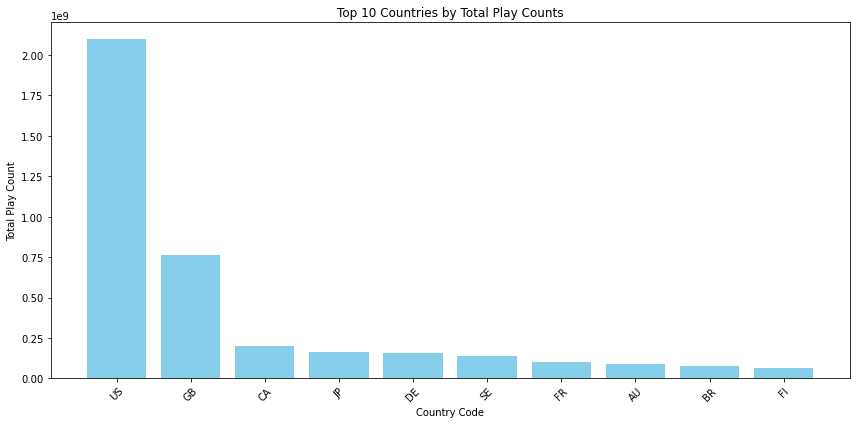

In [22]:
popularity_by_country = merged_df.groupby('country_code')['play_count'].sum().sort_values(ascending=False).head(10)
popularity_by_country_df = popularity_by_country.reset_index()

# plotting the top 10 results
plt.figure(figsize=(12, 6))
plt.bar(popularity_by_country_df['country_code'], popularity_by_country_df['play_count'], color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Total Play Count')
plt.title('Top 10 Countries by Total Play Counts')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


In [23]:
country_artist_playcount = merged_df.groupby(['country_code', 'artist_name'])['play_count'].sum().reset_index()
country_artist_playcount_sorted = country_artist_playcount.sort_values(['country_code', 'play_count'], ascending=[True, False])

# top 5 artists for each country
top5_artists_per_country = country_artist_playcount_sorted.groupby('country_code').head(5)
top5_artists_per_country

,country_code,artist_name,play_count
0,AD,Marta Roure,1335
1,AD,Susanne Georgi,10
3,AE,Ahmed Romel,5926
7,AE,Nervecell,1757
6,AE,Hussain Al Jassmi,612
...,...,...,...
97306,ZW,Oliver Mtukudzi,13953
97308,ZW,The Green Arrows,1387
97300,ZW,David Scobie,727
97309,ZW,Thomas Mapfumo and the Blacks Unlimited,704


In [24]:
# top 5 artists for each of the top countries
top_countries = merged_df.groupby('country_code')['play_count'].sum().sort_values(ascending=False).head(5).index.tolist()
top5_artists_by_top5_countries = merged_df[merged_df['country_code'].isin(top_countries)]
top_artists_grouped = top5_artists_by_top5_countries.groupby(['country_code', 'artist_name'])['play_count'].sum().reset_index()
top_artists_sorted = top_artists_grouped.sort_values(['country_code', 'play_count'], ascending=[True, False])
top5_artists_per_top5_countries = top_artists_sorted.groupby('country_code').head(5)

top5_artists_per_top5_countries

,country_code,artist_name,play_count
1795,CA,Placebo,14206255
128,CA,Arcade Fire,10731438
174,CA,Avril Lavigne,10632219
2505,CA,The Weeknd,8321824
519,CA,Crystal Castles,7416229
7723,DE,Rammstein,12635015
3572,DE,Blind Guardian,4594109
3447,DE,Beirut,4528352
5533,DE,Helloween,3172660
5889,DE,Johann Sebastian Bach,3127960


In [25]:
top_countries = merged_df.groupby('country_code')['play_count'].sum().nlargest(5).index
top_countries_data = merged_df[merged_df['country_code'].isin(top_countries)]

top_artists_per_country = top_countries_data.groupby('country_code') \
    .apply(lambda x: x.groupby('artist_name')['play_count'].sum().nlargest(5)) \
    .reset_index().rename(columns={0: 'Total Plays'})

top_artists_per_country

,country_code,artist_name,play_count
0,CA,Placebo,14206255
1,CA,Arcade Fire,10731438
2,CA,Avril Lavigne,10632219
3,CA,The Weeknd,8321824
4,CA,Crystal Castles,7416229
5,DE,Rammstein,12635015
6,DE,Blind Guardian,4594109
7,DE,Beirut,4528352
8,DE,Helloween,3172660
9,DE,Johann Sebastian Bach,3127960


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23822 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12415 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 27996 missing from current font.
  font.set_

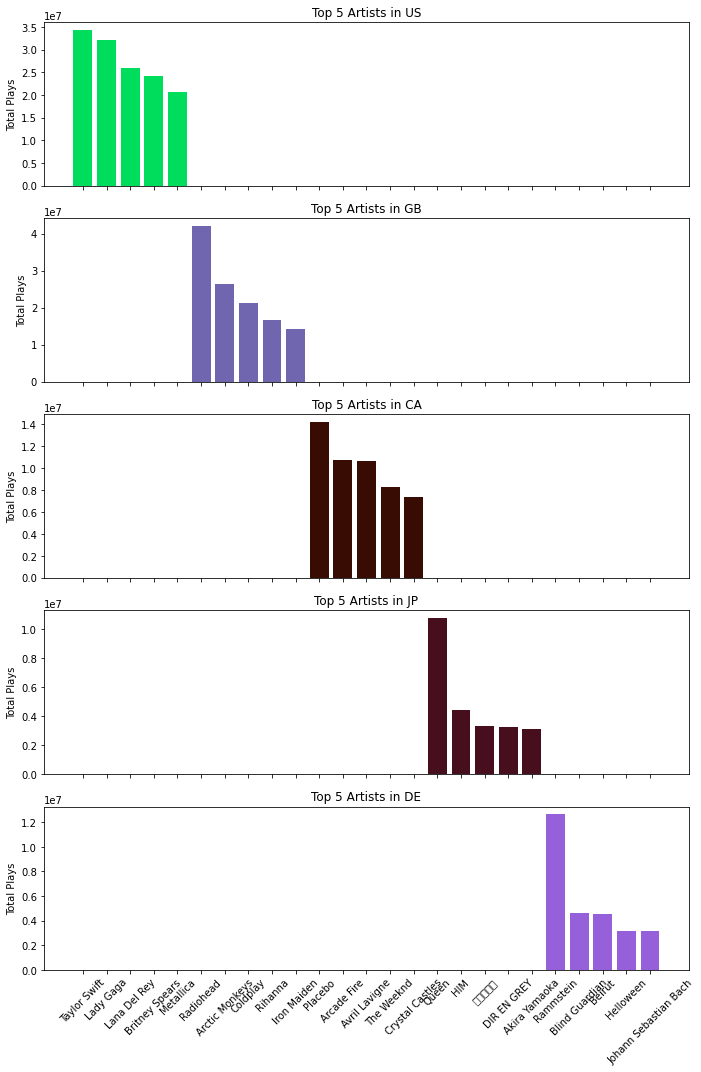

In [26]:
fig, axes = plt.subplots(nrows=len(top_countries), ncols=1, figsize=(10, 15), sharex=True)

for i, country in enumerate(top_countries):
    country_data = top_artists_per_country[top_artists_per_country['country_code'] == country]
    
    axes[i].bar(country_data['artist_name'], country_data['play_count'], color=np.random.rand(3,))
    axes[i].set_title(f'Top 5 Artists in {country}')
    axes[i].set_ylabel('Total Plays')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
merged_df

,Unnamed: 0.1,Unnamed: 0,user,artist_name,play_count,artist_url,Cluster,country_code
0,0,0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson,0,GB
1,1,1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem,0,US
2,2,2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky,0,US
3,3,3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park,0,US
4,7,7,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots,0,US
...,...,...,...,...,...,...,...,...
7682450,9453845,10031,ankurp,Placebo,377,https://www.last.fm/music/Placebo,0,CA
7682451,9453846,10032,ankurp,blink-182,373,https://www.last.fm/music/blink-182,0,US
7682452,9453847,10033,ankurp,Sprung Monkey,371,https://www.last.fm/music/Sprung+Monkey,0,US
7682453,9453848,10034,ankurp,Kings of Leon,366,https://www.last.fm/music/Kings+of+Leon,0,US


# Network Analysis

In [28]:
import networkx as nx
G = nx.DiGraph()

countries = top_artists_per_country['country_code'].unique()
G.add_nodes_from(countries)

 # assuming influence within the same country; you might want to adjust logic for cross-country influence
for _, row in top_artists_per_country.iterrows():
    source = row['country_code']
    G.add_edge(source, source, weight=row['play_count'])

print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['CA', 'DE', 'GB', 'JP', 'US']
Edges: [('CA', 'CA', {'weight': 7416229}), ('DE', 'DE', {'weight': 3127960}), ('GB', 'GB', {'weight': 14290430}), ('JP', 'JP', {'weight': 3105221}), ('US', 'US', {'weight': 20587889})]


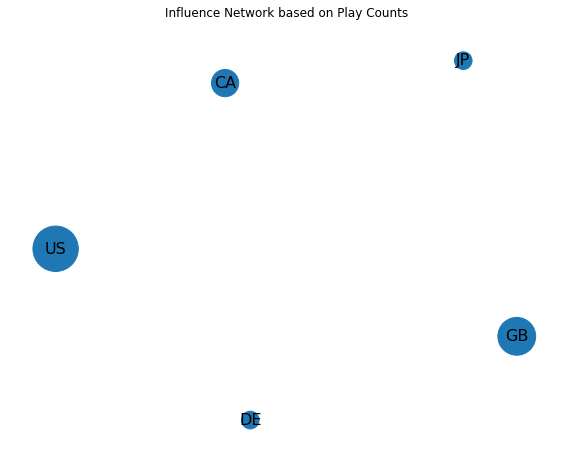

In [29]:
plt.figure(figsize=(10, 8))


node_weights = {node: G[node][node]['weight'] for node in G.nodes()}
scaling_factor = 1e-4  
node_sizes = [weight * scaling_factor for weight in node_weights.values()]


pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("Influence Network based on Play Counts")
plt.axis('off') 
plt.show()

# User Behavior Analysis (may not need)

           user  diversity_index
0        *RoRo*         0.609086
1      *Thomas*         1.038440
2    --BarteK--         0.270778
3  --Nocturne--         1.327285
4   --Venator--         1.732705


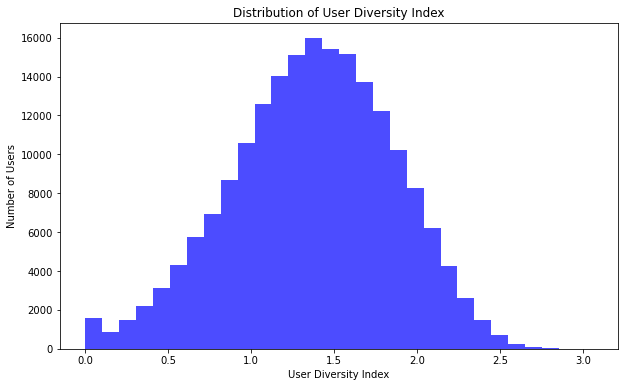

In [30]:
from scipy.stats import entropy

user_country_playcount = merged_df.groupby(['user', 'country_code'])['play_count'].sum().reset_index()
user_country_pivot = user_country_playcount.pivot(index='user', columns='country_code', values='play_count').fillna(0)
user_country_prob = user_country_pivot.div(user_country_pivot.sum(axis=1), axis=0)

# getting entropy of each user's play count distribution across countries
# "entropy is a measure of diversity - higher entropy means more diversity"
user_entropy = user_country_prob.apply(entropy, axis=1)

user_diversity_index = pd.DataFrame({'user': user_entropy.index, 'diversity_index': user_entropy.values})

print(user_diversity_index.head())

plt.figure(figsize=(10, 6))
plt.hist(user_diversity_index['diversity_index'], bins=30, alpha=0.7, color='blue')
plt.xlabel('User Diversity Index')
plt.ylabel('Number of Users')
plt.title('Distribution of User Diversity Index')
plt.show()


**COME BACK TO THIS**


"The User Diversity Index is a value that can range from 0 (no diversity, all plays are from a single country) to a higher number that indicates plays spread out across many countries. The exact upper limit depends on the number of countries in the dataset. The more uniformly distributed a user's plays are across different countries, the higher the entropy and, therefore, the higher the diversity index."

In [31]:
user_total_play_count = merged_df.groupby('user')['play_count'].sum()
user_unique_artists = merged_df.groupby('user')['artist_name'].nunique()
user_stats = pd.DataFrame({
    'total_play_count': user_total_play_count,
    'unique_artists': user_unique_artists
}).reset_index()

In [32]:
correlation_matrix = user_stats[['total_play_count', 'unique_artists']].corr()
print(correlation_matrix)

                  total_play_count  unique_artists
total_play_count          1.000000        0.105805
unique_artists            0.105805        1.000000


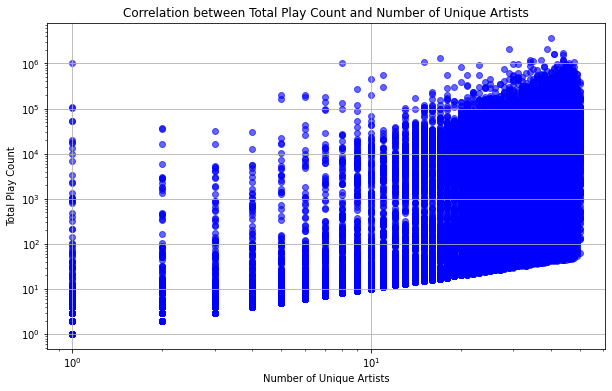

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(user_stats['unique_artists'], user_stats['total_play_count'], alpha=0.6, c='blue')
plt.title('Correlation between Total Play Count and Number of Unique Artists')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Total Play Count')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [34]:
user_total_play_count = merged_df.groupby('user')['play_count'].sum()
user_unique_artists = merged_df.groupby('user')['artist_name'].nunique()
user_stats = pd.DataFrame({
    'total_play_count': user_total_play_count,
    'unique_artists': user_unique_artists
})

In [35]:
correlation_coefficient = user_stats['total_play_count'].corr(user_stats['unique_artists'])
print(f'Correlation coefficient: {correlation_coefficient}')

Correlation coefficient: 0.1058053304241783


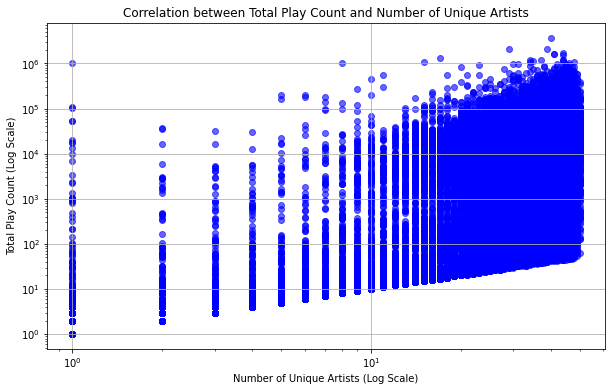

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(user_stats['unique_artists'], user_stats['total_play_count'], alpha=0.6, c='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Unique Artists (Log Scale)')
plt.ylabel('Total Play Count (Log Scale)')
plt.title('Correlation between Total Play Count and Number of Unique Artists')
plt.grid(True)
plt.show()
# this may be the same as above

With a coefficient of 0.106, it appears that there is a slight tendency that users who listen to more unique artists will have a higher total number of plays. However, the relationship is not strong. This means that while there might be a trend towards more diverse users having higher play counts, other factors are likely at play, and the number of unique artists a user listens to is not a strong predictor of their total play count on its own.

This analysis tells us that there's a bit more to user behavior than just the diversity of artists listened to, and it invites further investigation into what other factors might be influencing the total play counts. It's important to note that correlation does not imply causation, and the actual drivers of play count may be multifaceted.

# Clustering with Geographic Data Added